In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Poisson and Exponential Distributions

The Poisson distribution is useful for cases where we wish to predict the number of events happending in a fixed interval of time (or space).

For example, we might be trying to model the number of hurricanes in a given year or the number of visitors to a website in a given hour.

There are certain assumptions which must be met to use a Poisson distribution:

* $k$ is the number of times an event occurs in an interval and $k$ can take values 0, 1, 2, ....
* The occurrence of one event does not affect the probability that a second event will occur. That is, events occur independently.
* The average rate at which events occur is independent of any occurrences. For simplicity, this is usually assumed to be constant, but may in practice vary with time.
* Two events cannot occur at exactly the same instant; instead, at each very small sub-interval exactly one event either occurs or does not occur.

The file `fatal_crashes_2018.csv` contains a count, by day, of the number of fatal crashes that were reported in Davidson County in 2018.

In [2]:
fatal_crashes = pd.read_csv('../data/fatal_crash_counts_2018.csv')

In [3]:
fatal_crashes.head()

,date,num_fatal_crash
0,2018-01-01,0
1,2018-01-02,0
2,2018-01-03,1
3,2018-01-04,0
4,2018-01-05,0


We can look at the number of occurrences per day for the year:

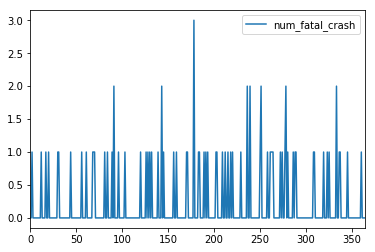

In [4]:
fatal_crashes.plot();

We can see that there was one day with three fatal crashes, a few days with two, many days with one, but the majority have zero.

In [5]:
fatal_crashes.num_fatal_crash.value_counts()

0    294
1     63
2      7
3      1
Name: num_fatal_crash, dtype: int64

To use a Poisson distribution, we need to know the average number of occurrences in the unit of time that we're interested in. Here, we'll use one day as our unit of time.

In [6]:
rate = fatal_crashes.num_fatal_crash.mean()
rate

0.2191780821917808

In [7]:
from scipy.stats import poisson

Let's see how well the Poisson distribution approximates what we say in the data. Let's look at the probability of each number of occurrences vs. what we observed. Recall that we need to use a probability *mass* function, since the Poisson distribution is a discrete probability distribution.

In [8]:
poisson_probabilities = poisson.pmf([0,1,2,3,4], mu = rate)

In [9]:
observed_probabilities = fatal_crashes.num_fatal_crash.value_counts(normalize = True).tolist() + [0]

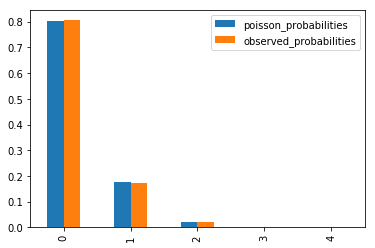

In [10]:
pd.DataFrame({'poisson_probabilities': poisson_probabilities, 'observed_probabilities': observed_probabilities}).plot(kind = 'bar');

If we adopt this Poisson model, then we use it to make estimates:

What is the probability of 1 or fewer fatal crashes on a given day?

In [11]:
poisson.cdf(1, mu = rate)

0.9792178349352485

What is the probability of at 3 or more fatal crashes?

In [12]:
1 - poisson.cdf(2, mu = rate)

0.0014902021785406783

## Exponential Distribution

Related to Poisson distributions are exponential distributions. Exponential distributions describe the wait times until the next occurrence of a poisson distribution.

The standard deviation and mean of an exponential distribution are equal to $1/rate$, where rate is the rate from the poisson process.

In [13]:
from scipy.stats import expon

In [14]:
@interact(rate = FloatSlider(value = 1, min = 0.1, max = 5)) # average number of events per interval
def expon_plot(rate):
    x = np.arange(start = -4, stop = 5, step = 0.01)
    plt.plot(x, expon.pdf(x, scale = 1/rate), color = 'black')
    plt.fill_between(x, expon.pdf(x, scale = 1/rate))
    plt.hlines(y = 0, xmin = 0, xmax = 5, color = 'black')
    plt.xlim(-0.1, 5);

interactive(children=(FloatSlider(value=1.0, description='rate', max=5.0, min=0.1), Output()), _dom_classes=('…

In our case, we might be interested in estimating how long until the next fatal crash.
What is the probability of the next fatal crash ocurring in the next day?

In [15]:
expon.cdf(x = 1, scale = 1/rate)

0.19682132640142544

What is the probability of at least one fatal crash in the next week?

In [16]:
expon.cdf(x = 7, scale = 1/rate)

0.784381918032991

What is the probability of no fatal crashes in the next two weeks?

In [17]:
1 - expon.cdf(x = 14, scale = 1/rate)

0.046491157271131844